ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade
Maximize
1.0*BIOMASS_SC4_bal - 1.0*BIOMASS_SC4_bal_reverse_bb385
Maximum productivity = 19.46467518075362 mmol/gDW*h
Maximum theoretical yield = 0.0973233759037681 mmol-EPA/mmol-glc
Objective of model is = Maximize
1.0*BIOMASS_SC4_bal - 1.0*BIOMASS_SC4_bal_reverse_bb385
Maximum theoretical biomass productivity: 0.09732337590376837 /h
Maximum theoretical productivity of EPA: 0.15900233826968102 mmol/gDW*h
Maximum theoretical biomass productivity: 6.385230506882285 /h
Maximum theoretical productivity of EPA pathway reaction: 9.796860572483833 mmol/gDW*h
Maximum theoretical biomass productivity: 5.16881956975369 /h
Maximum theoretical productivity of EPA pathway reaction: 8.062088428974636 mmol/gDW*h
Maximum theoretical biomass productivity: 4.4920703922914145 /h
Maximum theoretical productivity of EPA pathway reaction: 7.213930348258664 mmol/gDW*h

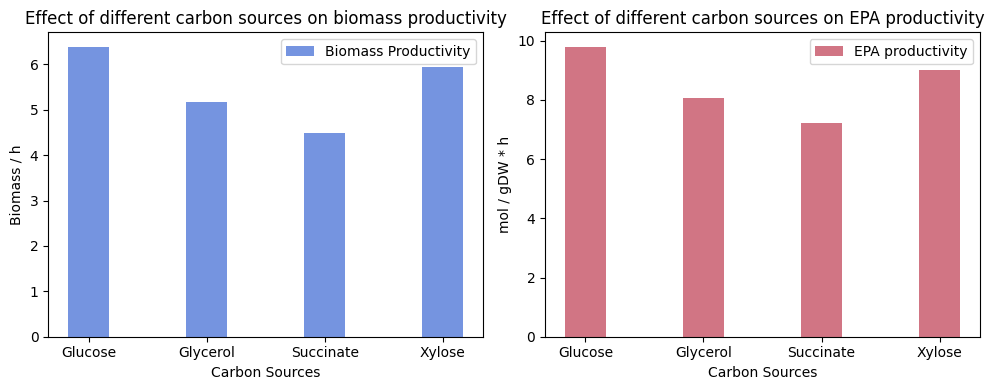

Maximum theoretical biomass productivity: 6.171779630339661 /h
Maximum theoretical productivity of EPA pathway reaction: 9.409048938134887 mmol/gDW*h


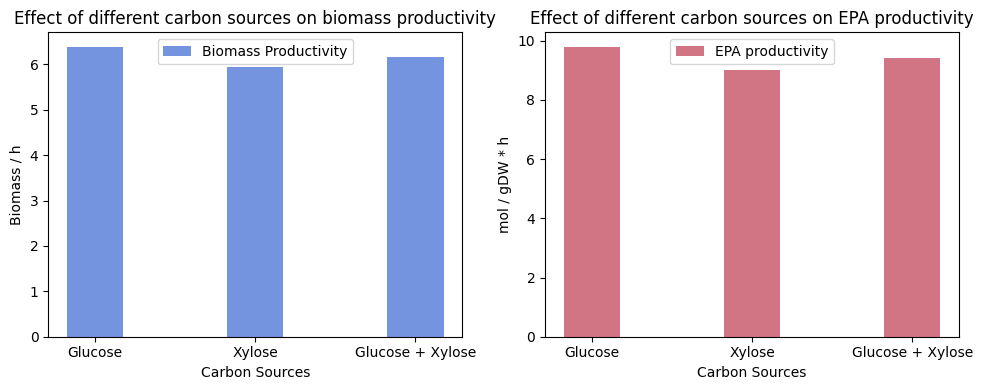

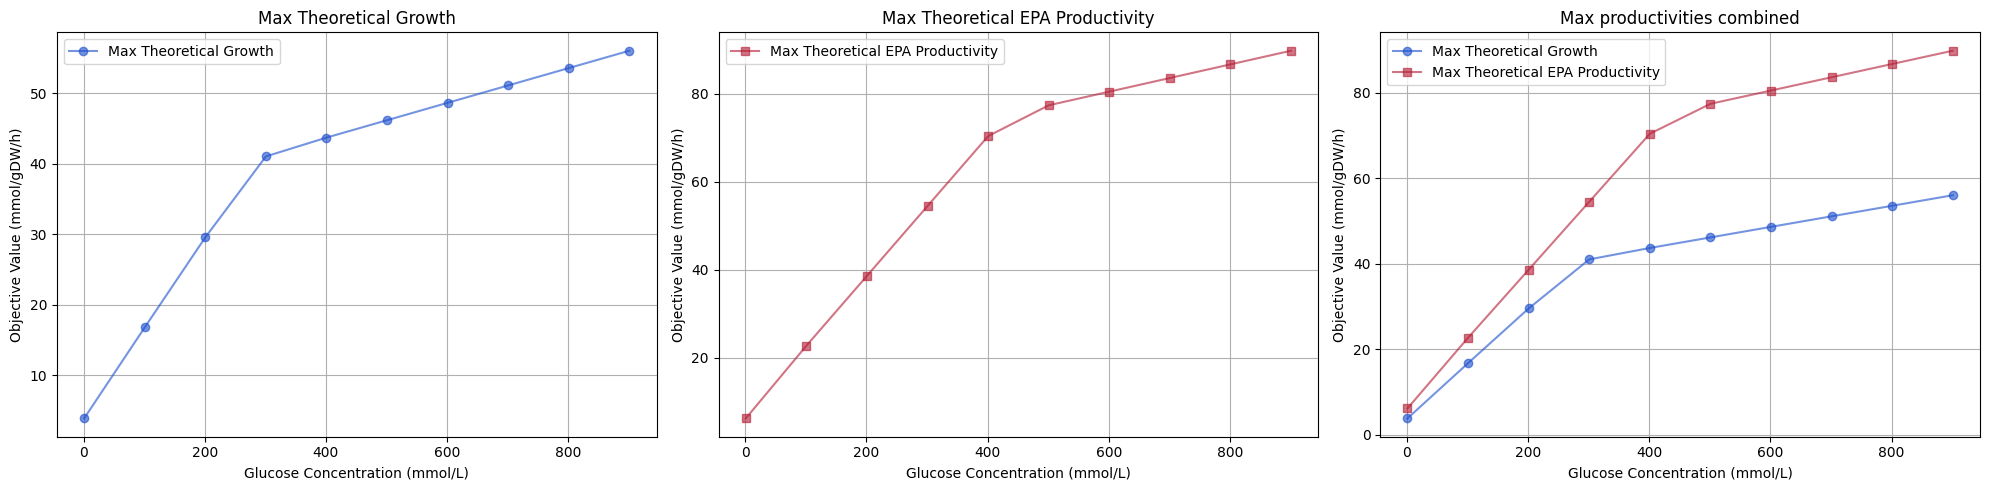

In [2]:
%run Medium_Opt_New_Model.ipynb

## Flux Scanning based on Enforced Objective Flux

The goal here is to identify the reactions that have either a positive or a negative effect towards the production of the target compound EPA

In [3]:
!pip install --upgrade Markupsafe==2.0.1

In [7]:
from collections.abc import Mapping
from cameo import models
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
fseof = FSEOF(model)
result = fseof.run(target=model.reactions.DM_Eicosapentaenoic_Acid)
df = result.data_frame
df

,1,2,3,4,5,6,7,8,9,10
ACOAH,11.716149,20.283103,28.850056,37.417010,45.982824,54.530172,63.064758,71.589063,80.082122,88.560580
ADHAPR_SC,0.145184,0.132652,0.120121,0.107590,0.095001,0.000000,0.000000,0.000000,0.000000,0.000000
ADK3,0.000000,-0.263442,-1.286860,-2.310278,-3.334342,-4.368862,-5.410611,-6.458181,-7.523446,-5.843352
ARGN,9.055423,9.136953,9.218483,9.300013,9.381915,9.469832,9.561909,9.657335,9.762942,12.626934
ARGSL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.753628
...,...,...,...,...,...,...,...,...,...,...
D9E,0.881717,1.763435,2.645152,3.526870,4.408587,5.290305,6.172022,7.053740,7.935457,8.817175
D8ds,0.881717,1.763435,2.645152,3.526870,4.408587,5.290305,6.172022,7.053740,7.935457,8.817175
D5ds,0.881717,1.763435,2.645152,3.526870,4.408587,5.290305,6.172022,7.053740,7.935457,8.817175
D17ds,0.881717,1.763435,2.645152,3.526870,4.408587,5.290305,6.172022,7.053740,7.935457,8.817175


A change of flux is seen in 111 of the reactions, including the reactions that are inserted heterologously. The reactions giving equal numbers (such as the inserted pathway) is due to the reactions running only one way, with no loops or utilizations elsewhere. 

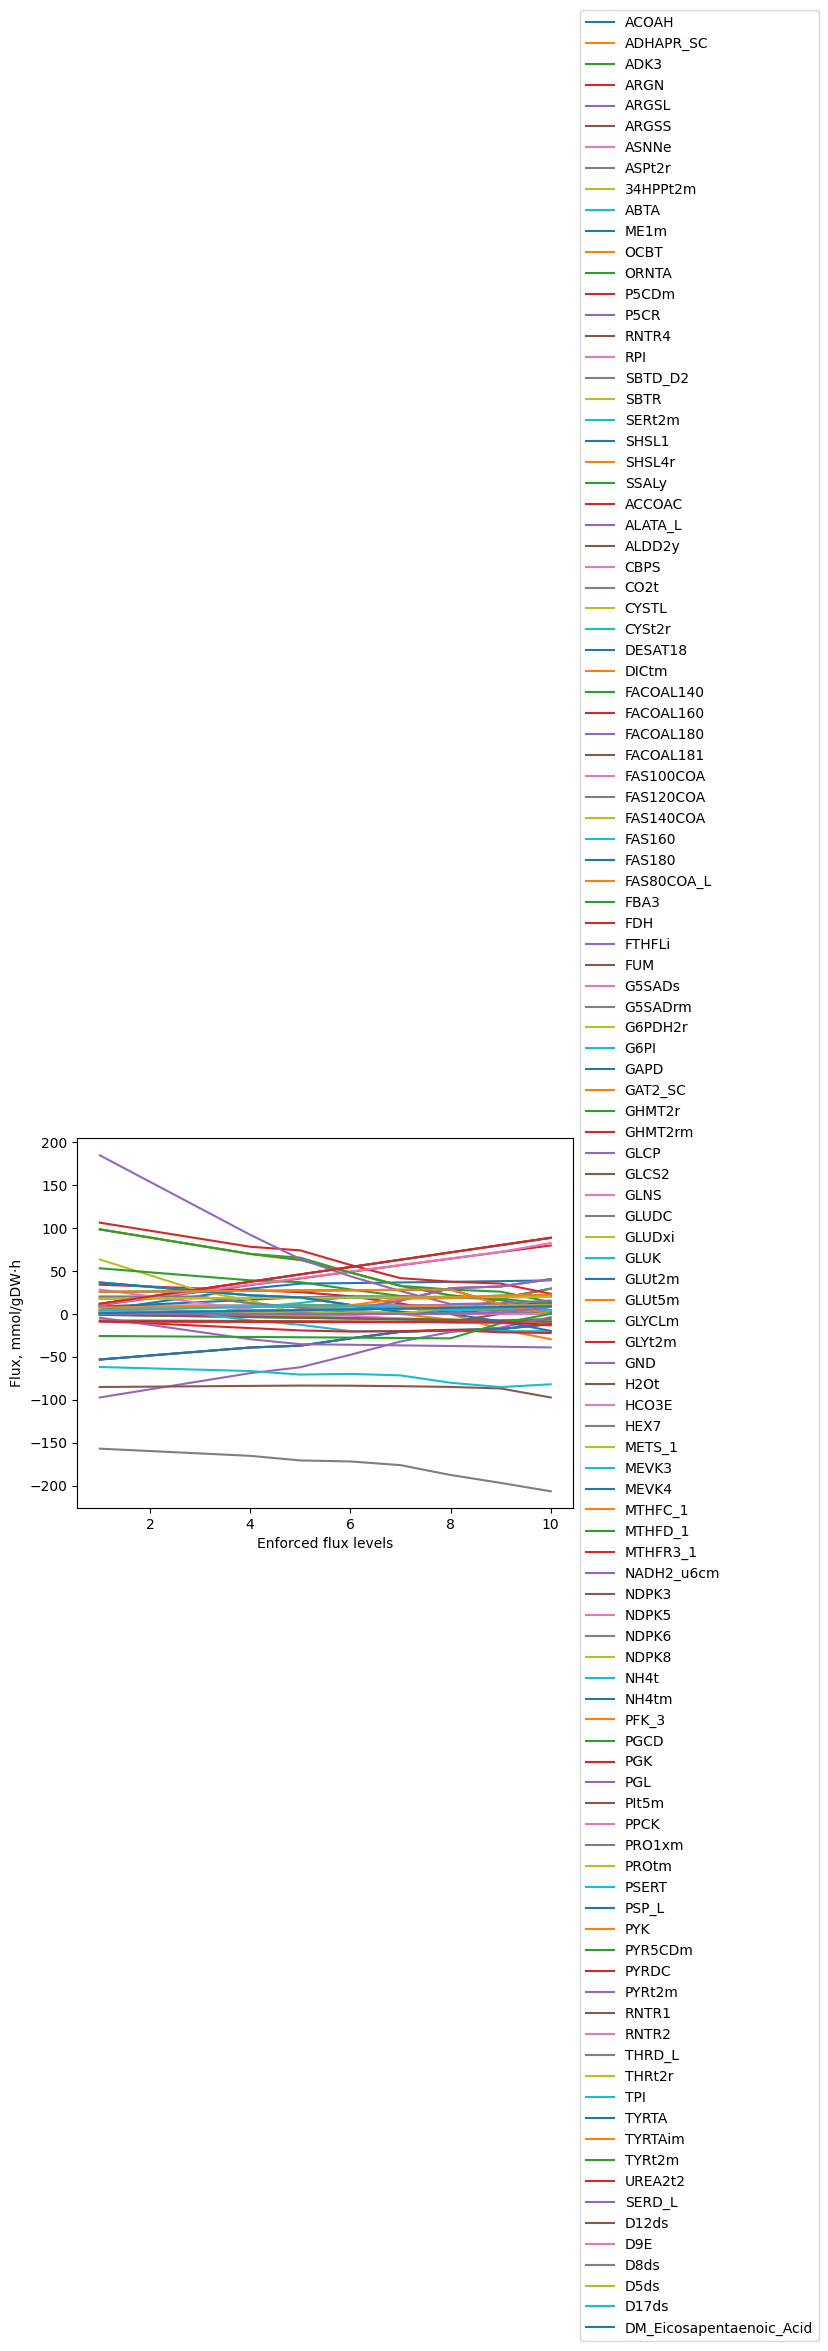

In [10]:
from matplotlib import pyplot as plt
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))
plt.xlabel("Enforced flux levels")
plt.ylabel("Flux, mmol/gDW·h")
plt.show()

This plot doensn't prove any valuable information as it is way too complicated, but the data can be visualized in a better way:

/tmp/ipykernel_6027/1627135296.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=90, ha='center')


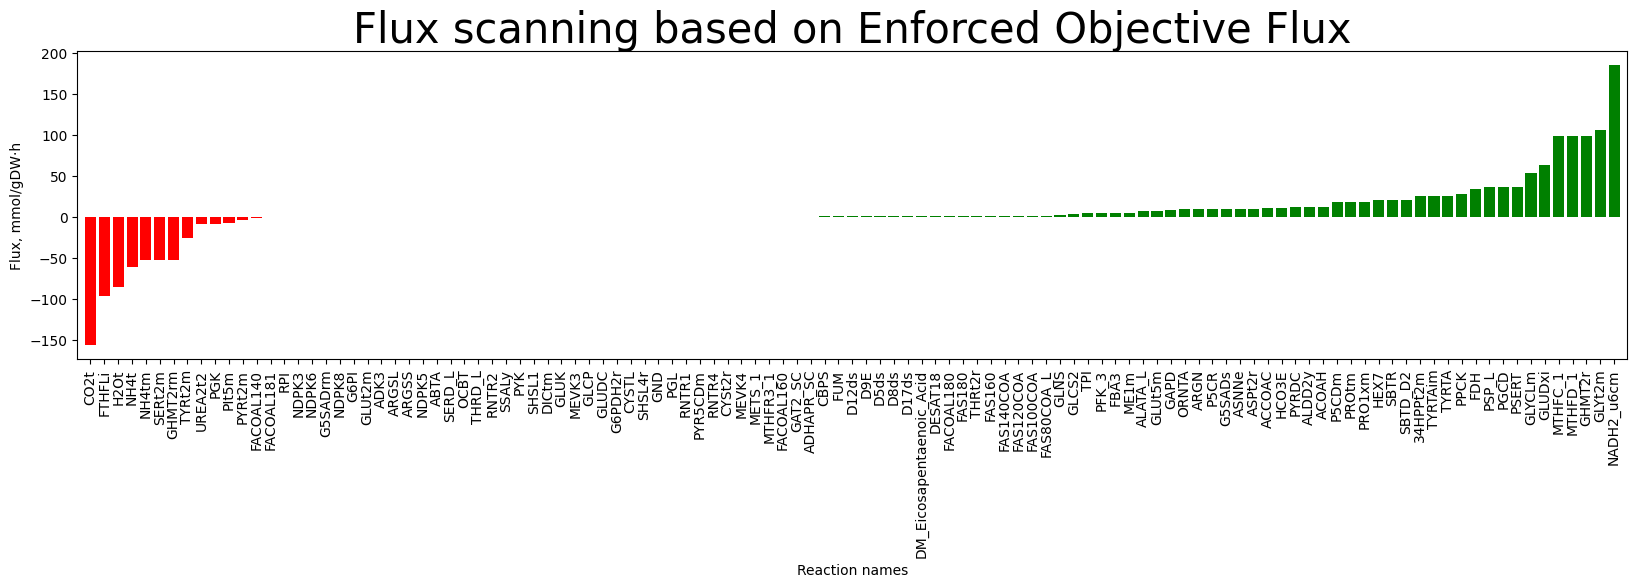

In [12]:
df = df.sort_values(by=df.columns[0], ascending=True)

def bar_color(df, color1, color2):
    return np.where(df.values >= 0, color1, color2)

fig, ax = plt.subplots(figsize=(20, 4))
bars = ax.bar(df.index, df[df.columns[0]], color=bar_color(df[df.columns[0]], 'green', 'red'))

ax.set_ylabel('Flux, mmol/gDW·h')
ax.set_xlabel('Reaction names')
ax.set_title('Flux scanning based on Enforced Objective Flux', size=30)

ax.set_xticklabels(df.index, rotation=90, ha='center')
ax.margins(x=0.005)


plt.show()

This plot visualizes the fluxes that provide a negative (red) effect on the production of EPA, and a positive (green) effect. This also means that the ones scoring around 0 has close to no effect on the final flux of EPA, and can therefore be neglected. We can then sort the top 5 negatives against the top 5 positives.

Text(0.5, 1.0, 'Flux scanning based on Enforced Objective Flux')

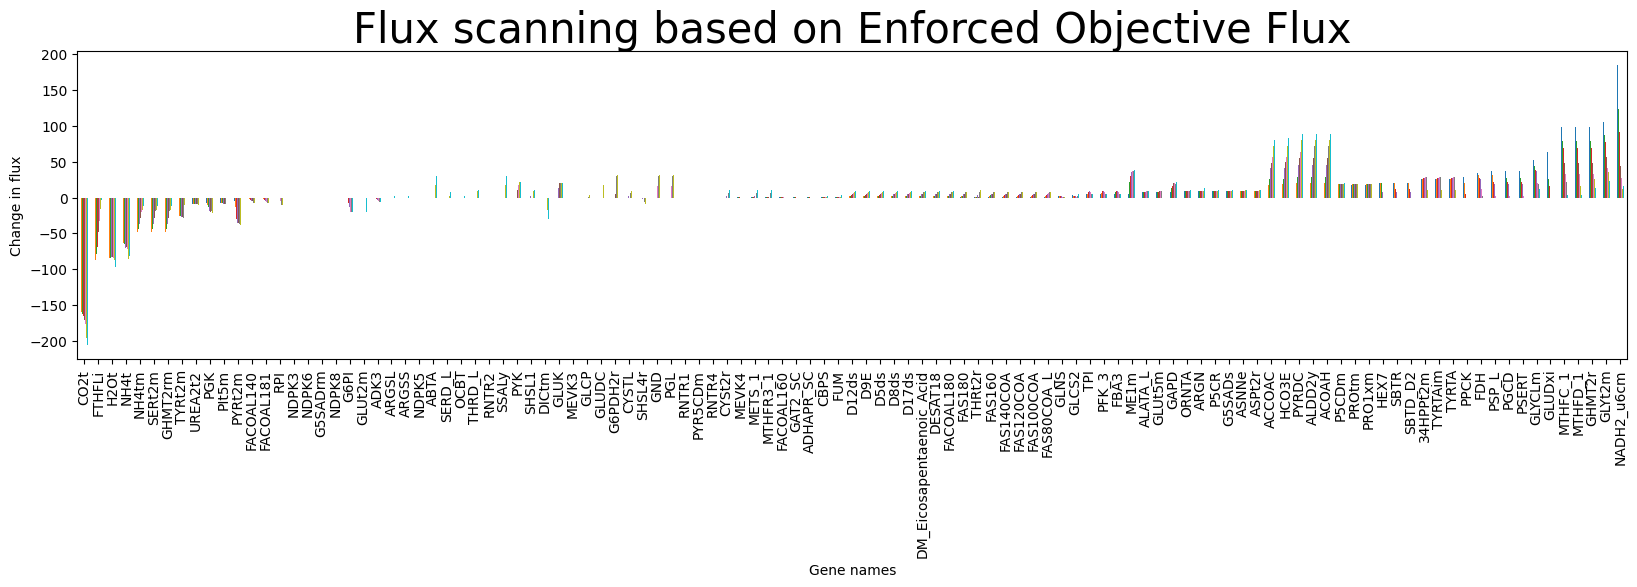

In [13]:
def bar_color(df,color2,color3):
    return np.where(df.values >=0,color2,color3).T

fig = df.plot(legend=False, kind='bar',figsize=(20, 4), grid =False)
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

In [15]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1

In [16]:
target_reactions_df = df[df['relative_change_in_flux'] > 1.9]

In [17]:
target_reactions_df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
TYRt2m,-25.693859,-26.065538,-26.437218,-26.808897,-27.182269,-27.583069,-28.002828,-28.437857,-10.913915,0.000000,inf
PIt5m,-7.606524,-7.813114,-8.019704,-8.226294,-8.433824,-8.656601,-8.889915,-9.131716,0.000000,0.000000,inf
FACOAL181,-0.881717,-1.763435,-2.645152,-3.526870,-4.408587,-5.290305,-6.172022,-7.053740,-7.935457,-8.817175,1.900000
RPI,-0.823100,-0.752055,-0.681011,-0.609966,-0.538597,-2.067878,-5.526555,-10.280410,-10.842752,-13.601280,1.939484
G6PI,0.000000,0.000000,0.000000,-7.441116,-12.679859,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,2.000000
GLUt2m,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.606068,-19.743460,2.000000
ADK3,0.000000,-0.263442,-1.286860,-2.310278,-3.334342,-4.368862,-5.410611,-6.458181,-7.523446,-5.843352,2.000000
ARGSL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.753628,2.000000
ARGSS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.753628,2.000000
NDPK5,0.000000,0.000000,0.000000,0.000000,-0.009231,-0.007918,-0.006543,-0.005118,-0.003540,-0.001892,2.000000


In [18]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)

Text(0.5, 1.0, 'Reactions with a relative change in Flux > 90%')

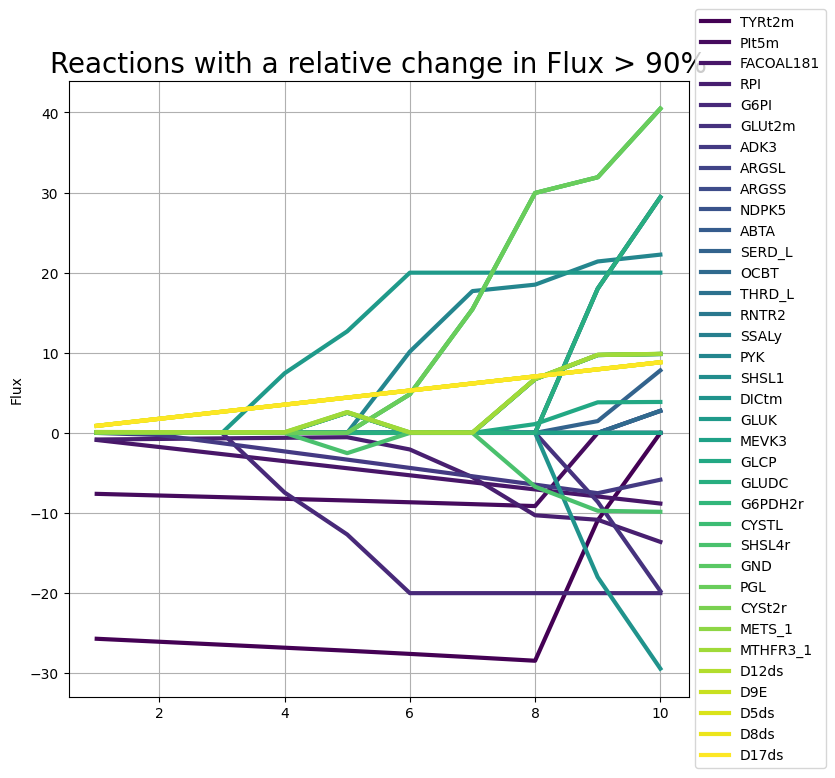

In [22]:
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 90%', size=20)

This plot, again, is somewhat confusing, but it shows that some of the reactions depend highly on flux of others, potentially changing the trend. To sum up, reactions with a positive change in flux are shown below:

In [16]:
target_reactions_df.tail()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
D12ds,0.881717,1.763435,2.645152,3.52687,4.408587,5.290305,6.172022,7.05374,7.935457,8.817175,1.9
D9E,0.881717,1.763435,2.645152,3.52687,4.408587,5.290305,6.172022,7.05374,7.935457,8.817175,1.9
D5ds,0.881717,1.763435,2.645152,3.52687,4.408587,5.290305,6.172022,7.05374,7.935457,8.817175,1.9
D8ds,0.881717,1.763435,2.645152,3.52687,4.408587,5.290305,6.172022,7.05374,7.935457,8.817175,1.9
D17ds,0.881717,1.763435,2.645152,3.52687,4.408587,5.290305,6.172022,7.05374,7.935457,8.817175,1.9


And the reactions with a negative change in flux 

In [18]:
target_reactions_df.head()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
TYRt2m,-25.693859,-26.065538,-26.437218,-26.808897,-27.182269,-27.583069,-28.002828,-28.437857,-10.913915,0.000000,inf
PIt5m,-7.606524,-7.813114,-8.019704,-8.226294,-8.433824,-8.656601,-8.889915,-9.131716,0.000000,0.000000,inf
FACOAL181,-0.881717,-1.763435,-2.645152,-3.526870,-4.408587,-5.290305,-6.172022,-7.053740,-7.935457,-8.817175,1.900000
RPI,-0.823100,-0.752055,-0.681011,-0.609966,-0.538597,-2.067878,-5.526555,-10.280410,-10.842752,-13.601280,1.939484
G6PI,0.000000,0.000000,0.000000,-7.441116,-12.679859,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,2.000000


In [ ]:
#See if any of the reactions can be knocked out without any changes to flux

In [20]:
print('complete model: ', model.optimize())
with model:
    model.reactions.TYRt2m.knock_out()
    print('TYRt2m knocked out: ', model.optimize())
with model:
    model.reactions.PIt5m.knock_out()
    print('PIt5m knocked out: ', model.optimize())
with model:
    model.reactions.FACOAL181.knock_out()
    print('FACOAL181 knocked out: ', model.optimize())
with model:
    model.reactions.RPI.knock_out()
    print('RPI knocked out: ', model.optimize())
with model:
    model.reactions.G6PI.knock_out()
    print('G6PI knocked out: ', model.optimize())

complete model:  <Solution 6.385 at 0x7fcd95efd690>
TYRt2m knocked out:  <Solution 6.385 at 0x7fcd964980a0>
PIt5m knocked out:  <Solution 6.385 at 0x7fcd964980a0>
FACOAL181 knocked out:  <Solution 6.385 at 0x7fcd964980a0>
RPI knocked out:  <Solution -0.000 at 0x7fcd964980a0>
G6PI knocked out:  <Solution 6.385 at 0x7fcd964980a0>


Of the 5 reactions contributing most negatively towards the flux, only RPI seems to have a direct / essential effect